x0=0.095, M=6.648, μ=0.986


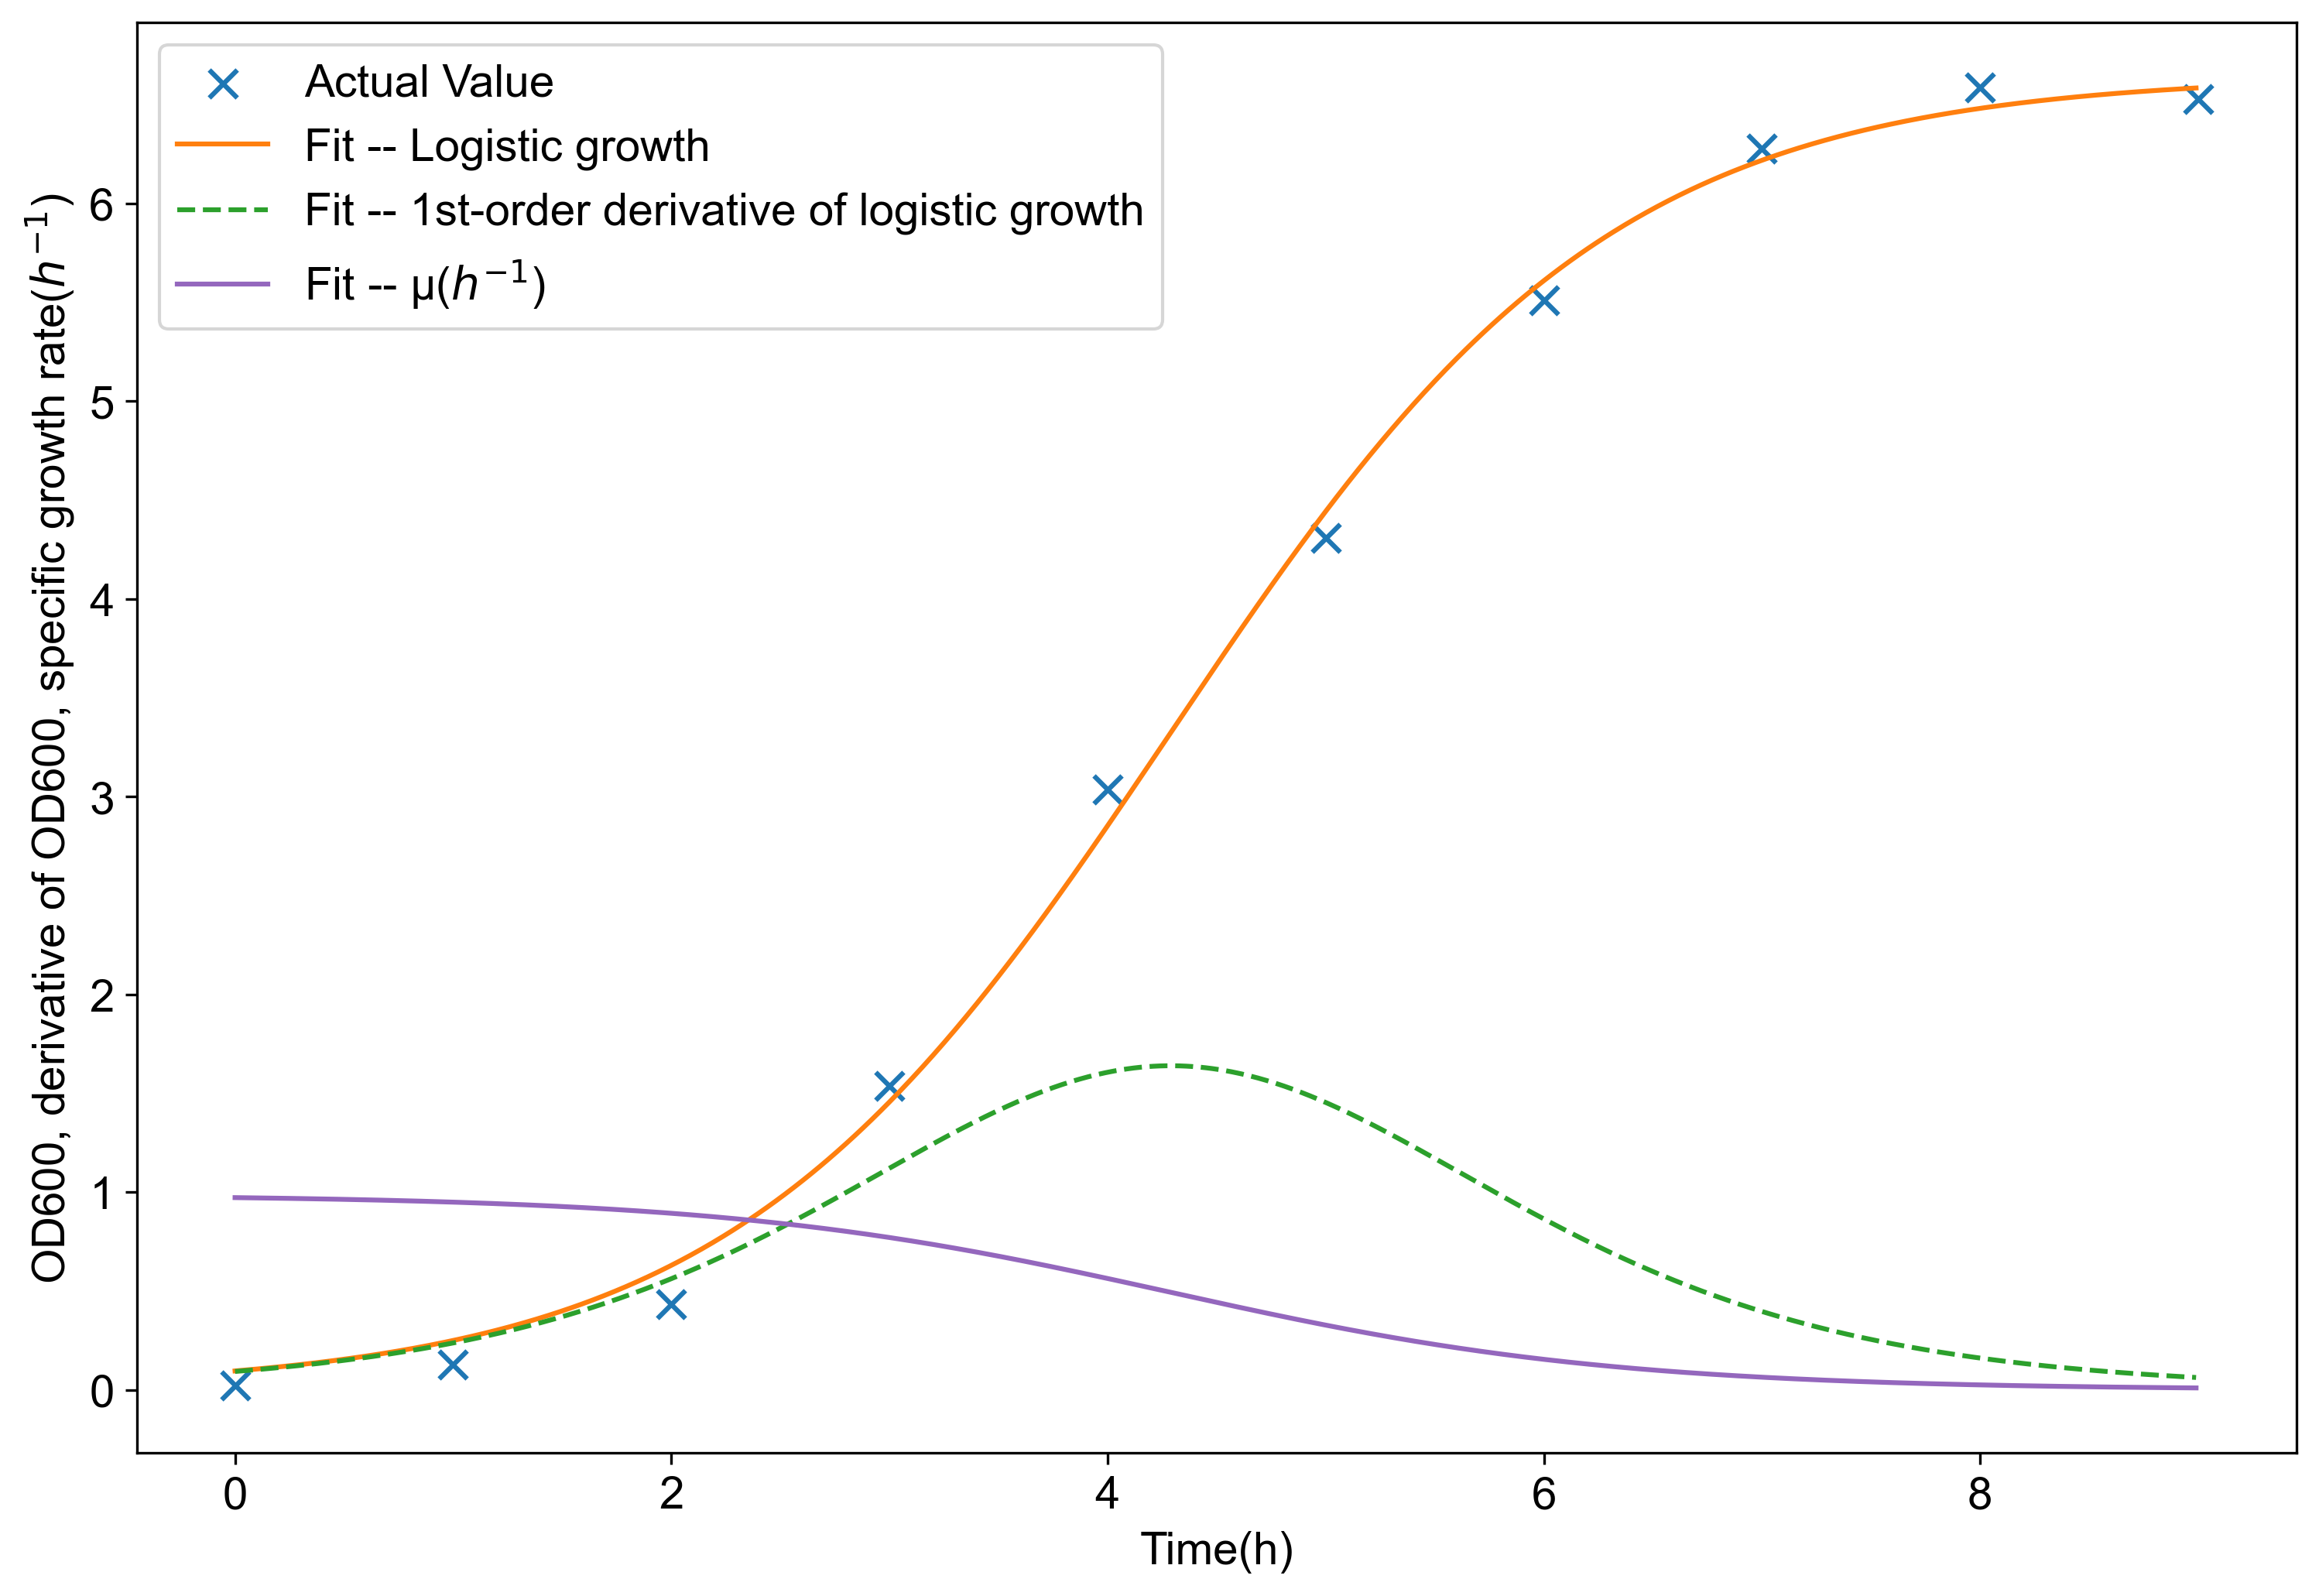

In [9]:


import numpy as np
from scipy import optimize as op
import matplotlib.pyplot as mplt
from matplotlib import rcParams

# time point
timeArray = [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]
# population amount
AmountArray = [0.0203, 0.1280, 0.4320, 1.5375, 3.0373,
               4.3100, 5.5110, 6.2770, 6.5860, 6.5260]
# Get the max value of timeArray
timeMax = max(timeArray)


def LogisticGrowth(t, x0, M, miu):
    '''
    Logistic Growth Equation's Parameters Description:
    ------------------------
    t: time/h

    x0: initial amount, OD600 for bacteria
    M: environmental capacity, max OD for bacteria
    miu: specific growth rate,μ (/h)
    '''
    # f =M/(exp(-t*u)*(M/X0 - 1) + 1)
    return M*x0/((M-x0)/np.exp(miu*t)+x0)


def DifLG(t, x0, M, miu):
    # df =(M*u*exp(-t*u)*(M/X0 - 1))/(exp(-t*u)*(M/X0 - 1) + 1)^2
    return (M*miu*np.exp(-t*miu)*(M/x0 - 1))/np.square(np.exp(-t*miu)*(M/x0 - 1) + 1)


def SpecificGrowthRate(t, x0, M, miu):
    # u =(u*exp(-t*u)*(M/X0 - 1))/(exp(-t*u)*(M/X0 - 1) + 1)
    return (miu*np.exp(-t*miu)*(M/x0 - 1))/(np.exp(-t*miu)*(M/x0 - 1) + 1)


def DifSGR(t, x0, M, miu):
    # du =(u^2*exp(-2*t*u)*(M/X0 - 1)^2)/(exp(-t*u)*(M/X0 - 1) + 1)^2 - (u^2*exp(-t*u)*(M/X0 - 1))/(exp(-t*u)*(M/X0 - 1) + 1)
    return (np.square(miu)*np.exp(-2*t*miu)*np.square(M/x0 - 1))/(np.exp(-t*miu)*np.square(M/x0 - 1) + 1) - (np.square(miu)*np.exp(-t*miu)*(M/x0 - 1))/(np.exp(-t*miu)*(M/x0 - 1) + 1)

def ExpGrowth(t,x0,miu):
    return x0*np.exp(miu*t)

# Fit the equation and get the parameters: x0, M, miu
x0, M, miu = op.curve_fit(LogisticGrowth, timeArray, AmountArray)[0]
print('x0=%5.3f, M=%5.3f, μ=%5.3f' % (x0, M, miu))
# Set the x-axis range
x = np.arange(0, timeMax, 0.01)
f = LogisticGrowth(x, x0, M, miu)
df = DifLG(x, x0, M, miu)
u = SpecificGrowthRate(x, x0, M, miu)
du = DifSGR(x, x0, M, miu)

fMax=max(f)

m02=ExpGrowth(x,x0,0.2)
m03=ExpGrowth(x,x0,0.3)
m04=ExpGrowth(x,x0,0.4)
m05=ExpGrowth(x,x0,0.5)
m06=ExpGrowth(x,x0,0.6)
m07=ExpGrowth(x,x0,0.7)
m08=ExpGrowth(x,x0,0.8)
m09=ExpGrowth(x,x0,0.9)
m10=ExpGrowth(x,x0,1.0)

mplt.rcParams['font.sans-serif'] = ['Arial']
mplt.rcParams['font.size'] = 14

fig=mplt.figure(figsize=(12, 8),dpi=300)
mplt.xlabel('Time(h)')
mplt.ylabel('OD600, derivative of OD600, specific growth rate($h^{-1}$)')


mplt.scatter(timeArray, AmountArray, marker='x', s=75,
             label='Actual Value', color='tab:blue')
mplt.plot(x, f, label='Fit -- Logistic growth',
          linestyle='-', color='tab:orange')
mplt.plot(x, df, label='Fit -- 1st-order derivative of logistic growth',
          linestyle='--', color='tab:green')
mplt.plot(
    x, u, label='Fit -- μ($h^{-1}$)', linestyle='-', color='tab:purple')
#mplt.plot(x, du, label='Fit -- 1st-order derivative of μ',
#          linestyle='--', color='tab:cyan')
mplt.legend()


x0=0.095, M=6.648, μ=0.986


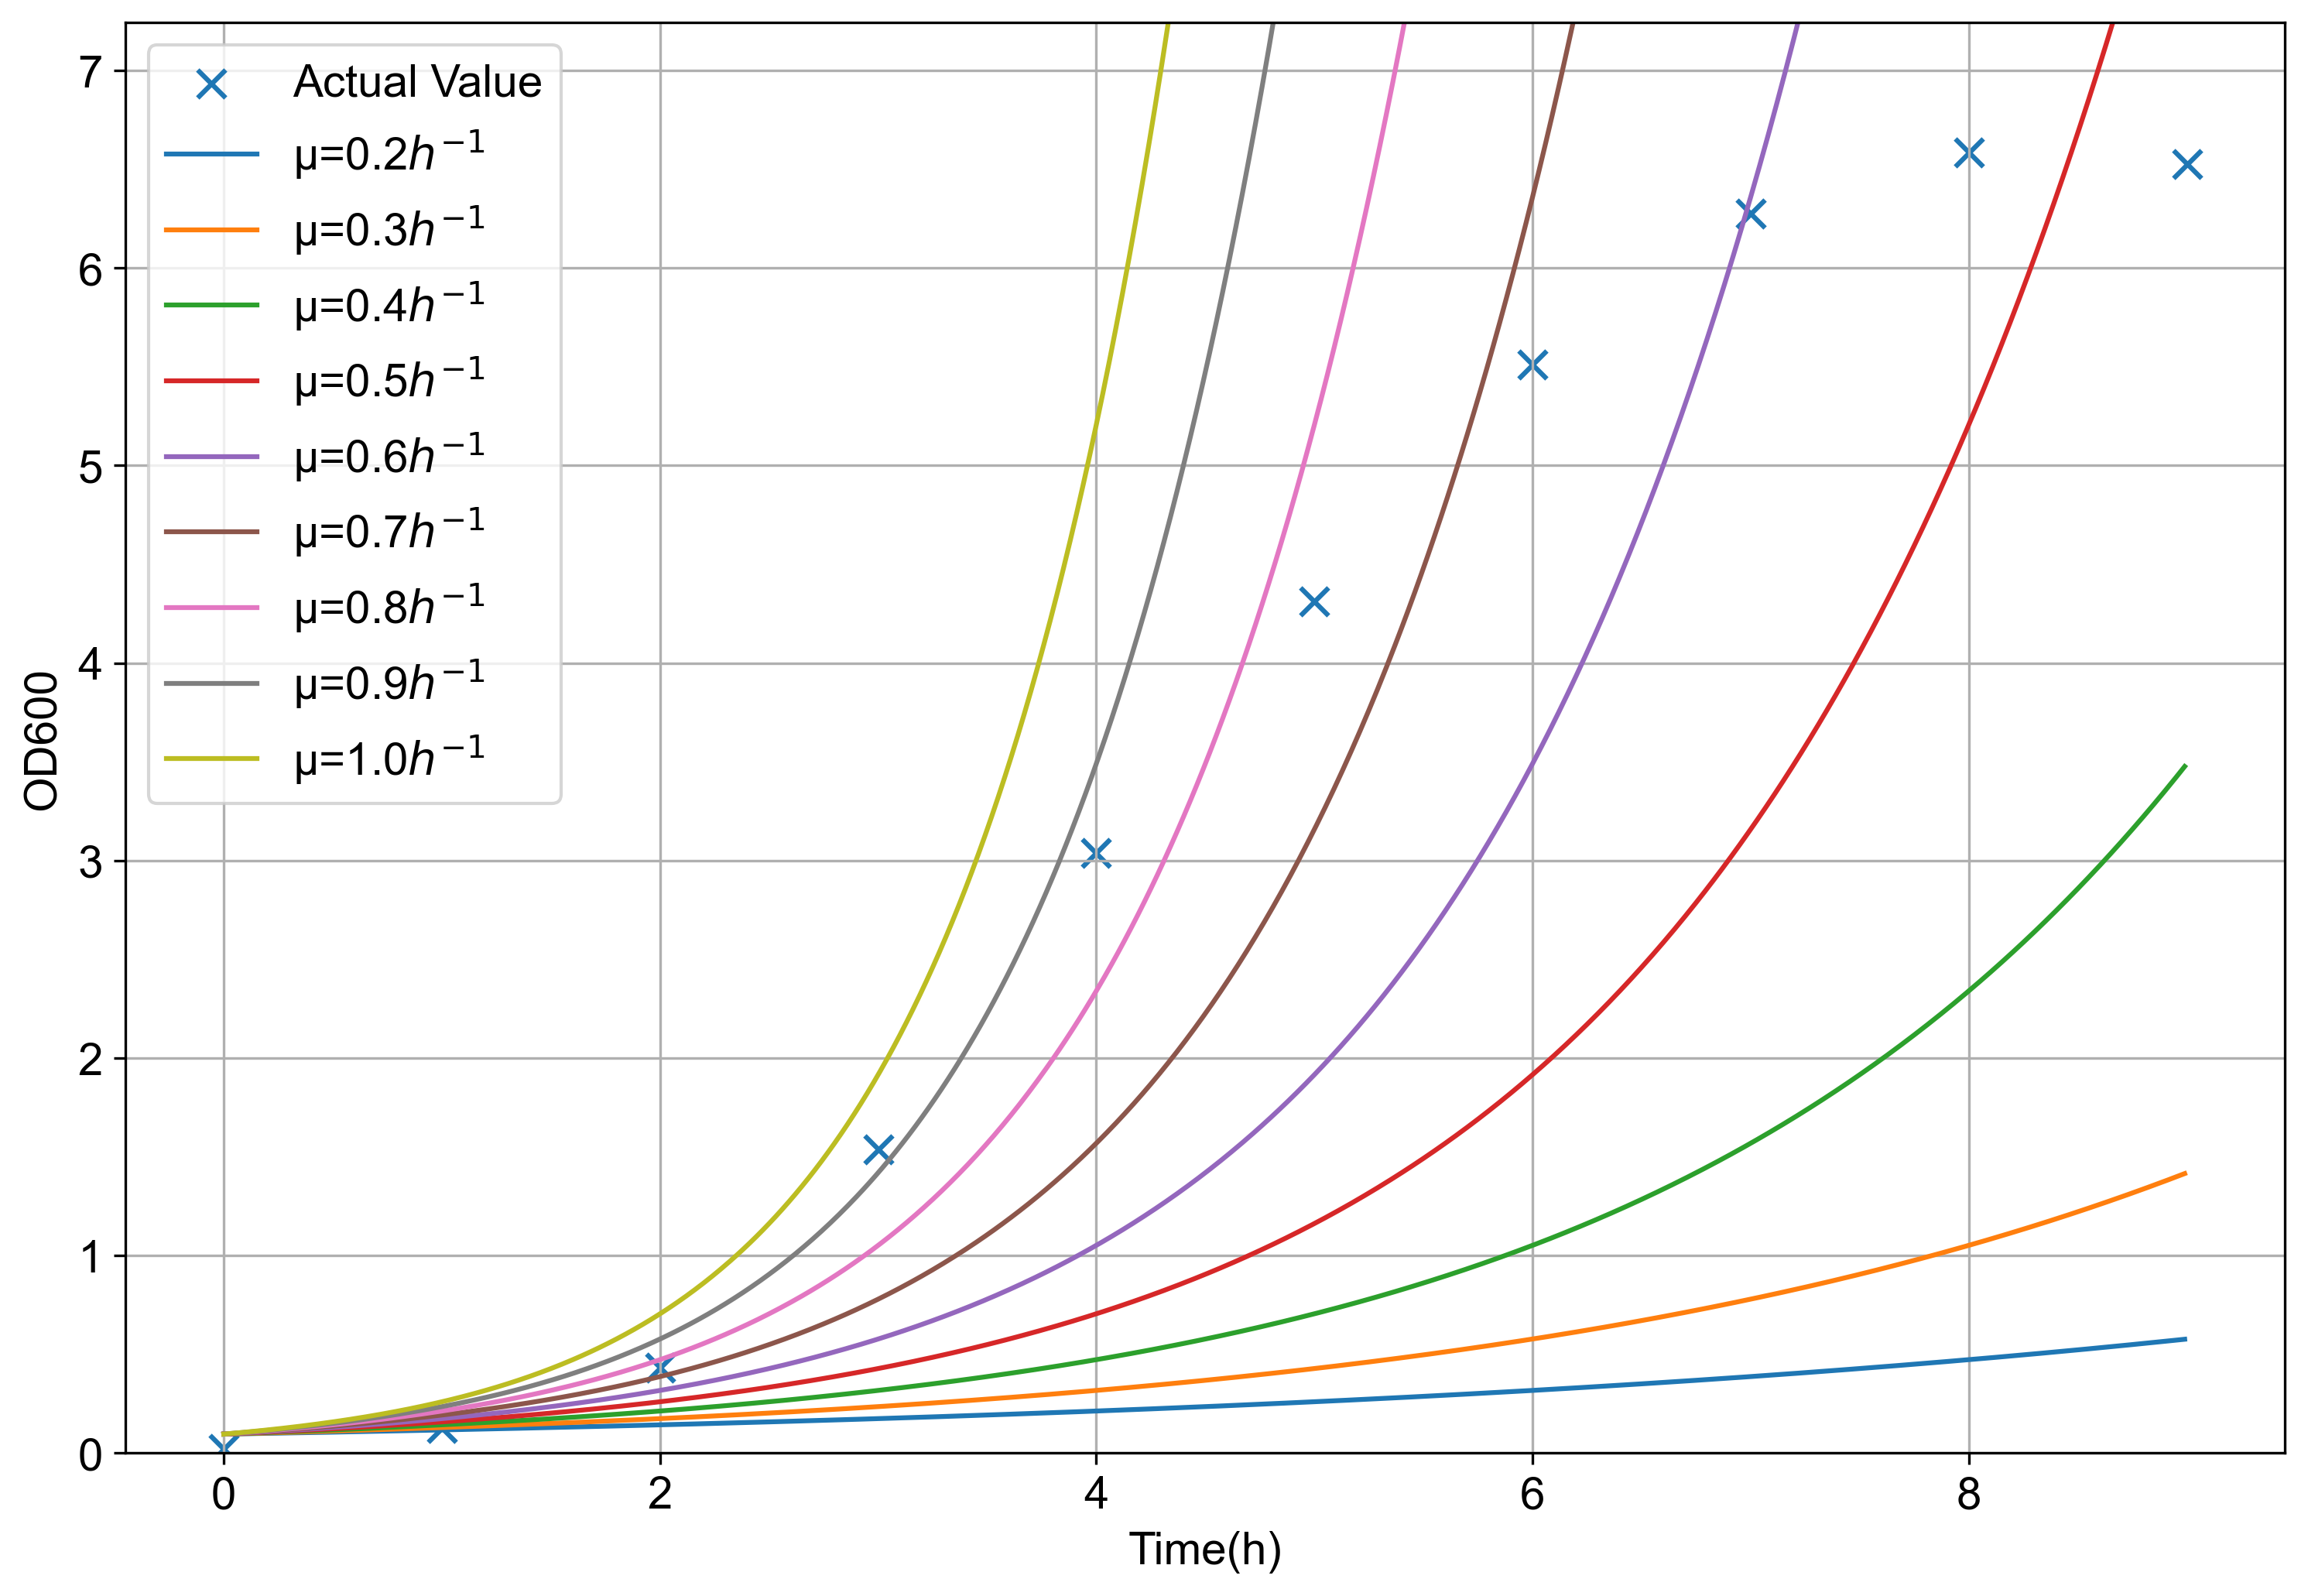

In [10]:
# Copyright (C) 2022 styslxb
# 
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Affero General Public License as
# published by the Free Software Foundation, either version 3 of the
# License, or (at your option) any later version.
# 
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Affero General Public License for more details.
# 
# You should have received a copy of the GNU Affero General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

import numpy as np
from scipy import optimize as op
import matplotlib.pyplot as mplt
from matplotlib import rcParams

# time point
timeArray = [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]
# population amount
AmountArray = [0.0203, 0.1280, 0.4320, 1.5375, 3.0373,
               4.3100, 5.5110, 6.2770, 6.5860, 6.5260]
# Get the max value of timeArray
timeMax = max(timeArray)


def LogisticGrowth(t, x0, M, miu):
    '''
    Logistic Growth Equation's Parameters Description:
    ------------------------
    t: time/h

    x0: initial amount, OD600 for bacteria
    M: environmental capacity, max OD for bacteria
    miu: specific growth rate,μ (/h)
    '''
    # f =M/(exp(-t*u)*(M/X0 - 1) + 1)
    return M*x0/((M-x0)/np.exp(miu*t)+x0)


# def DifLG(t, x0, M, miu):
#     # df =(M*u*exp(-t*u)*(M/X0 - 1))/(exp(-t*u)*(M/X0 - 1) + 1)^2
#     return (M*miu*np.exp(-t*miu)*(M/x0 - 1))/np.square(np.exp(-t*miu)*(M/x0 - 1) + 1)


# def SpecificGrowthRate(t, x0, M, miu):
#     # u =(u*exp(-t*u)*(M/X0 - 1))/(exp(-t*u)*(M/X0 - 1) + 1)
#     return (miu*np.exp(-t*miu)*(M/x0 - 1))/(np.exp(-t*miu)*(M/x0 - 1) + 1)


# def DifSGR(t, x0, M, miu):
#     # du =(u^2*exp(-2*t*u)*(M/X0 - 1)^2)/(exp(-t*u)*(M/X0 - 1) + 1)^2 - (u^2*exp(-t*u)*(M/X0 - 1))/(exp(-t*u)*(M/X0 - 1) + 1)
#     return (np.square(miu)*np.exp(-2*t*miu)*np.square(M/x0 - 1))/(np.exp(-t*miu)*np.square(M/x0 - 1) + 1) - (np.square(miu)*np.exp(-t*miu)*(M/x0 - 1))/(np.exp(-t*miu)*(M/x0 - 1) + 1)

def ExpGrowth(t,x0,miu):
    return x0*np.exp(miu*t)

# Fit the equation and get the parameters: x0, M, miu
x0, M, miu = op.curve_fit(LogisticGrowth, timeArray, AmountArray)[0]
print('x0=%5.3f, M=%5.3f, μ=%5.3f' % (x0, M, miu))
# Set the x-axis range
x = np.arange(0, timeMax, 0.01)
# f = LogisticGrowth(x, x0, M, miu)
# df = DifLG(x, x0, M, miu)
# u = SpecificGrowthRate(x, x0, M, miu)
# du = DifSGR(x, x0, M, miu)

fMax=1.1*np.max(f)

m02=ExpGrowth(x,x0,0.2)
m03=ExpGrowth(x,x0,0.3)
m04=ExpGrowth(x,x0,0.4)
m05=ExpGrowth(x,x0,0.5)
m06=ExpGrowth(x,x0,0.6)
m07=ExpGrowth(x,x0,0.7)
m08=ExpGrowth(x,x0,0.8)
m09=ExpGrowth(x,x0,0.9)
m10=ExpGrowth(x,x0,1.0)

mplt.rcParams['font.sans-serif'] = ['Arial']
mplt.rcParams['font.size'] = 14

fig=mplt.figure(figsize=(12, 8),dpi=300)
mplt.xlabel('Time(h)')
mplt.ylabel('OD600')
mplt.ylim(0,fMax)

mplt.grid(True)

mplt.scatter(timeArray, AmountArray, marker='x', s=75,
             label='Actual Value', color='tab:blue')
mplt.plot(x,m02,label='μ=0.2$h^{-1}$',linestyle='-')
mplt.plot(x,m03,label='μ=0.3$h^{-1}$',linestyle='-')
mplt.plot(x,m04,label='μ=0.4$h^{-1}$',linestyle='-')
mplt.plot(x,m05,label='μ=0.5$h^{-1}$',linestyle='-')
mplt.plot(x,m06,label='μ=0.6$h^{-1}$',linestyle='-')
mplt.plot(x,m07,label='μ=0.7$h^{-1}$',linestyle='-')
mplt.plot(x,m08,label='μ=0.8$h^{-1}$',linestyle='-')
mplt.plot(x,m09,label='μ=0.9$h^{-1}$',linestyle='-')
mplt.plot(x,m10,label='μ=1.0$h^{-1}$',linestyle='-')

# mplt.plot(x, f, label='Fit -- Logistic growth',
#           linestyle='-', color='tab:orange')
# mplt.plot(x, df, label='Fit -- 1st-order derivative of logistic growth',
#           linestyle='--', color='tab:green')
# mplt.plot(
#     x, u, label='Fit -- μ($h^{-1}$)', linestyle='-', color='tab:purple')
# #mplt.plot(x, du, label='Fit -- 1st-order derivative of μ',
# #          linestyle='--', color='tab:cyan')
mplt.legend()
mplt.show()

